In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 12:51:30-05:00,7.0,9.0,11.0,14.0,NaN,9.0,11.0,8.0,10.0,14.0,11.0,NaN,0.0
2023-10-05 12:52:00-05:00,7.0,9.0,10.0,14.0,10.0,10.0,10.0,8.0,9.0,NaN,10.0,NaN,0.0
2023-10-05 12:52:30-05:00,6.0,9.0,11.0,14.0,10.0,9.0,10.0,8.0,9.0,12.0,9.0,NaN,0.0
2023-10-05 12:53:00-05:00,6.0,9.0,10.0,13.0,NaN,9.0,10.0,8.0,8.0,10.0,9.0,NaN,0.0
2023-10-05 12:53:30-05:00,6.0,NaN,10.0,14.0,10.0,9.0,9.0,9.0,7.0,9.0,10.0,9.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,899.000000,745.000000,788.000000,842.000000,779.000000,799.000000,887.000000,871.000000,864.000000,864.000000,877.000000,750.000000,892.0
mean,5.080089,4.412081,8.013959,15.513064,3.885751,7.289111,5.523112,8.458094,8.557870,5.027778,6.614595,4.406667,0.0
std,2.707375,1.328195,3.670489,11.398122,2.230552,4.863322,3.649001,3.904937,4.426705,3.317382,5.890141,1.364712,0.0
min,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.0
25%,3.000000,4.000000,5.000000,7.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,0.0
50%,4.000000,4.000000,7.000000,12.000000,3.000000,6.000000,4.000000,9.000000,9.000000,4.000000,4.000000,4.000000,0.0
75%,8.000000,5.000000,10.000000,22.000000,5.000000,10.000000,9.000000,11.000000,11.000000,8.000000,10.000000,5.000000,0.0
max,12.000000,9.000000,20.000000,49.000000,10.000000,25.000000,17.000000,21.000000,21.000000,15.000000,24.000000,9.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 12:51:30-05:00,30.0,38.0,46.0,55.0,NaN,38.0,46.0,34.0,42.0,55.0,46.0,NaN,0.0
2023-10-05 12:52:00-05:00,30.0,38.0,42.0,55.0,42.0,42.0,42.0,34.0,38.0,NaN,42.0,NaN,0.0
2023-10-05 12:52:30-05:00,25.0,38.0,46.0,55.0,42.0,38.0,42.0,34.0,38.0,50.0,38.0,NaN,0.0
2023-10-05 12:53:00-05:00,25.0,38.0,42.0,53.0,NaN,38.0,42.0,34.0,34.0,42.0,38.0,NaN,0.0
2023-10-05 12:53:30-05:00,25.0,NaN,42.0,55.0,42.0,38.0,38.0,38.0,30.0,38.0,42.0,38.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,899.000000,745.000000,788.000000,842.000000,779.000000,799.000000,887.000000,871.000000,864.000000,864.000000,877.000000,750.000000,892.0
mean,21.670745,18.707383,33.021574,53.230404,16.667522,29.566959,23.252537,34.920781,34.858796,21.387731,26.285063,18.692000,0.0
std,11.274196,5.473324,13.669294,30.211252,9.207330,17.695707,14.693000,14.962157,16.371795,13.622331,20.738553,5.609197,0.0
min,9.000000,9.000000,13.000000,9.000000,5.000000,9.000000,9.000000,13.000000,13.000000,0.000000,0.000000,9.000000,0.0
25%,13.000000,17.000000,21.000000,30.000000,9.000000,13.000000,13.000000,17.000000,17.000000,13.000000,9.000000,13.000000,0.0
50%,17.000000,17.000000,30.000000,50.000000,13.000000,25.000000,17.000000,38.000000,38.000000,17.000000,17.000000,17.000000,0.0
75%,34.000000,21.000000,42.000000,72.000000,21.000000,42.000000,38.000000,46.000000,46.000000,34.000000,42.000000,21.000000,0.0
max,50.000000,38.000000,68.000000,135.000000,42.000000,79.000000,62.000000,70.000000,70.000000,58.000000,77.000000,38.000000,0.0


## Histograms

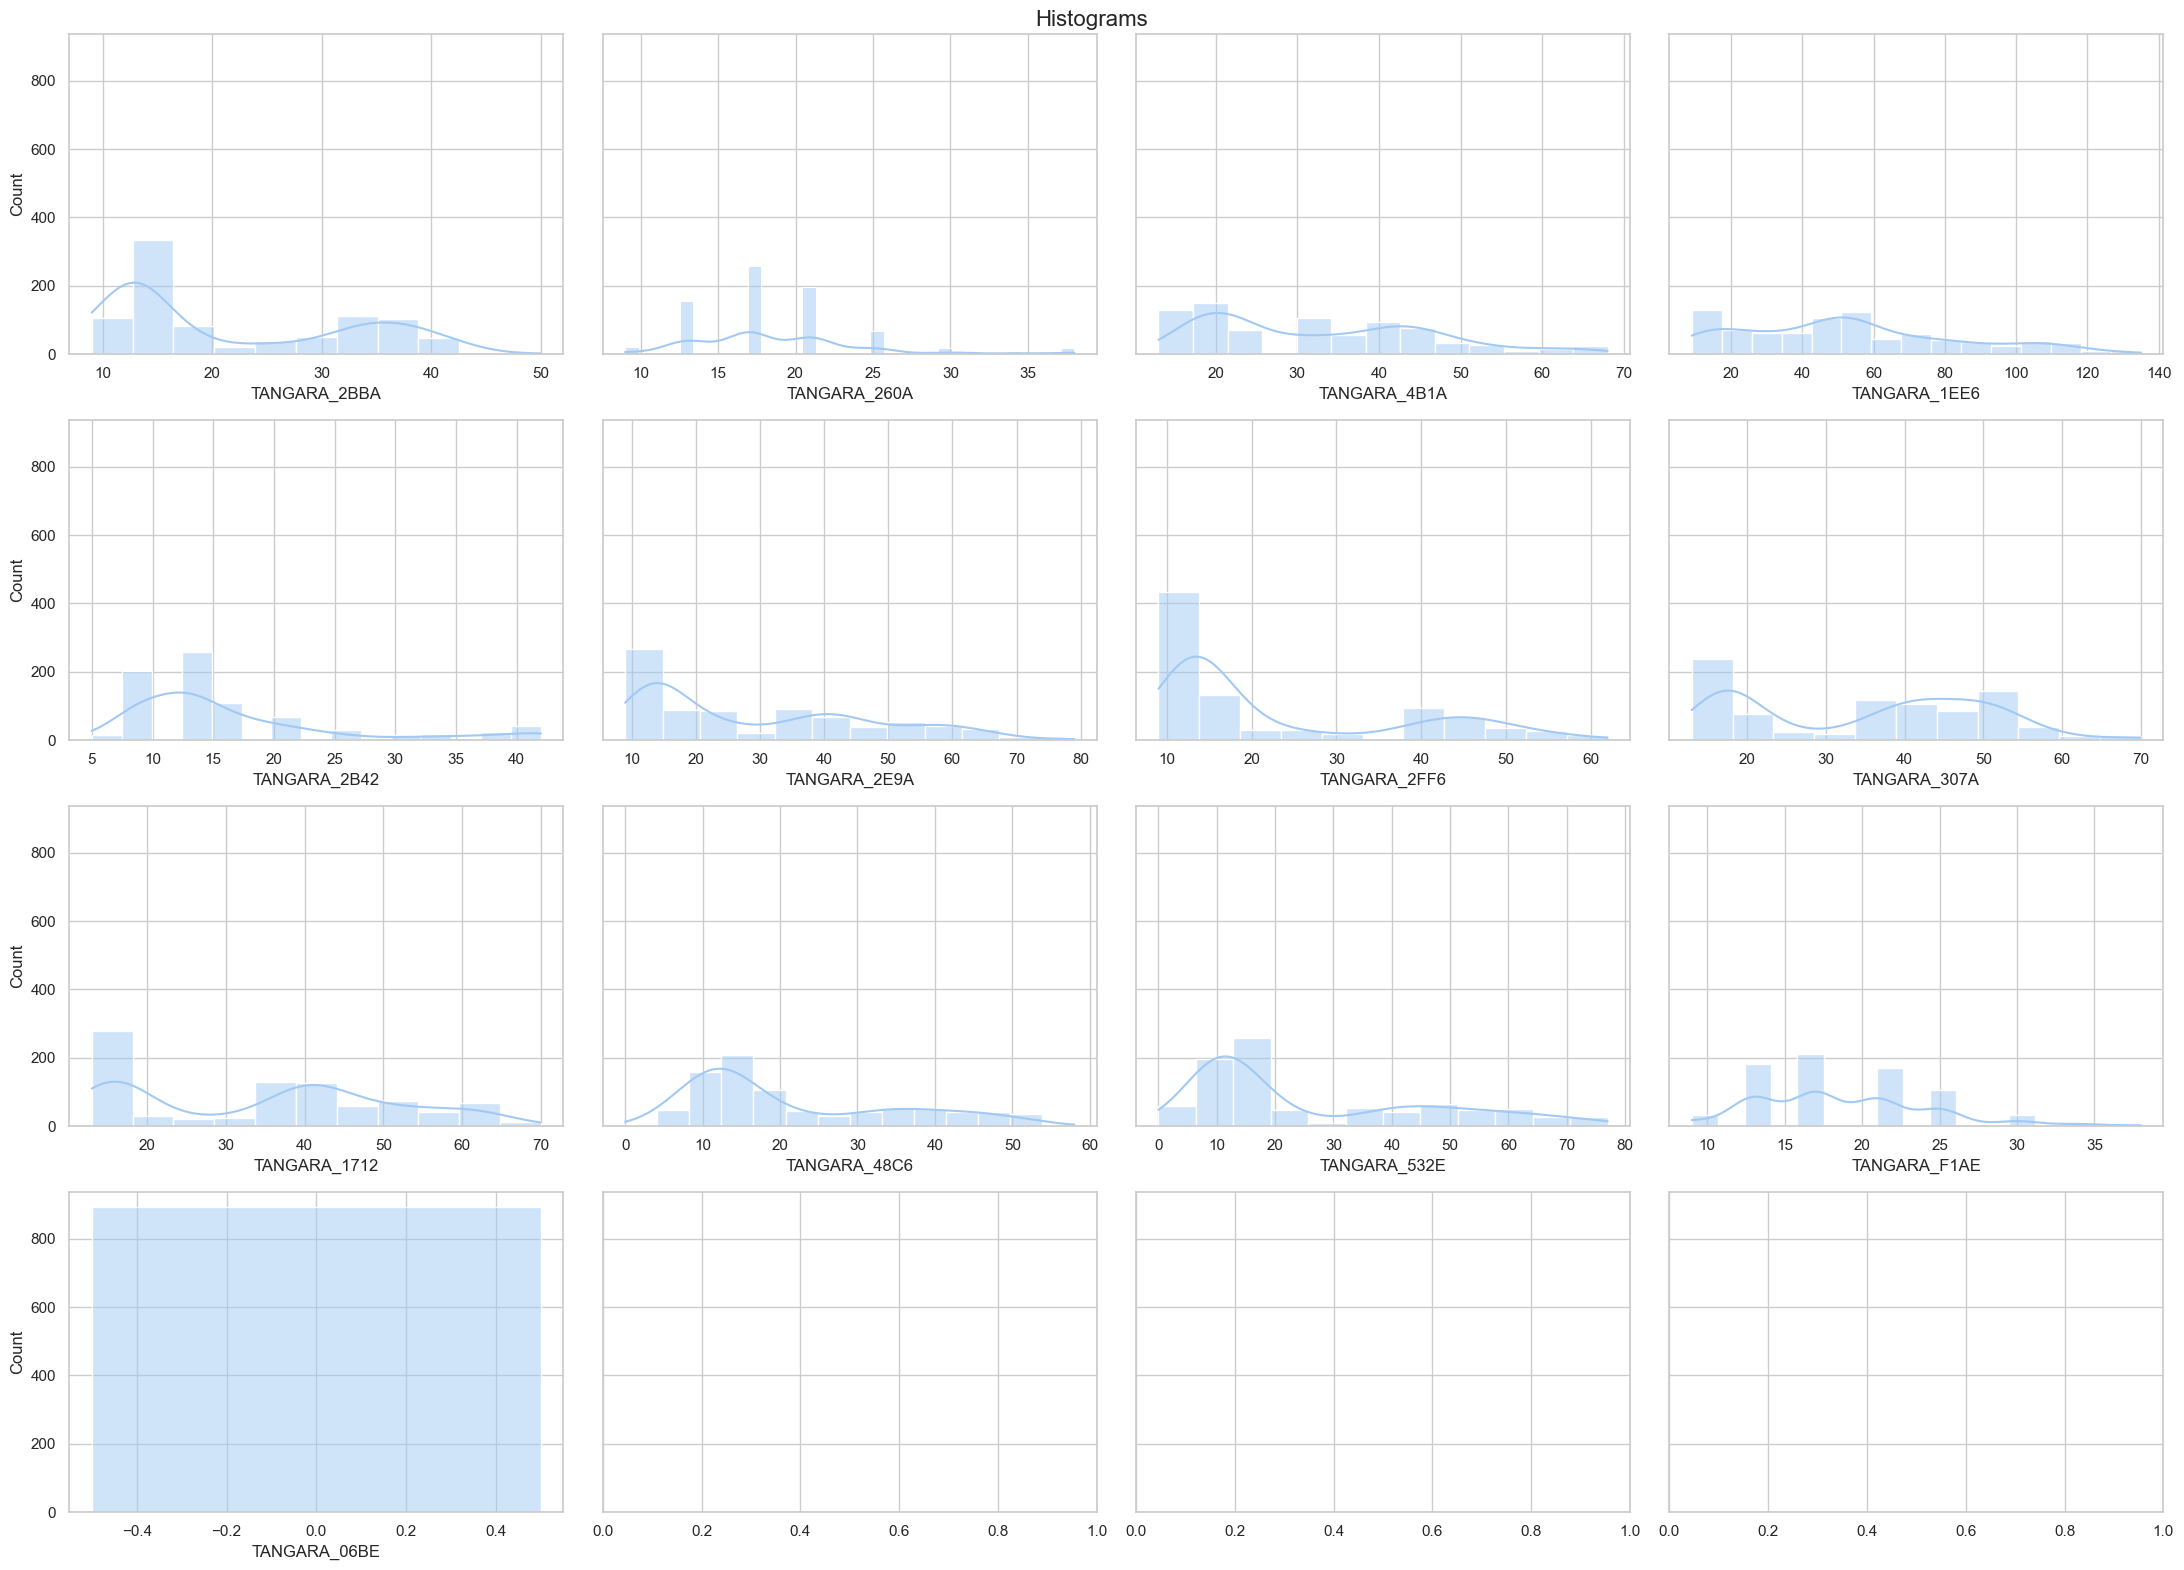

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

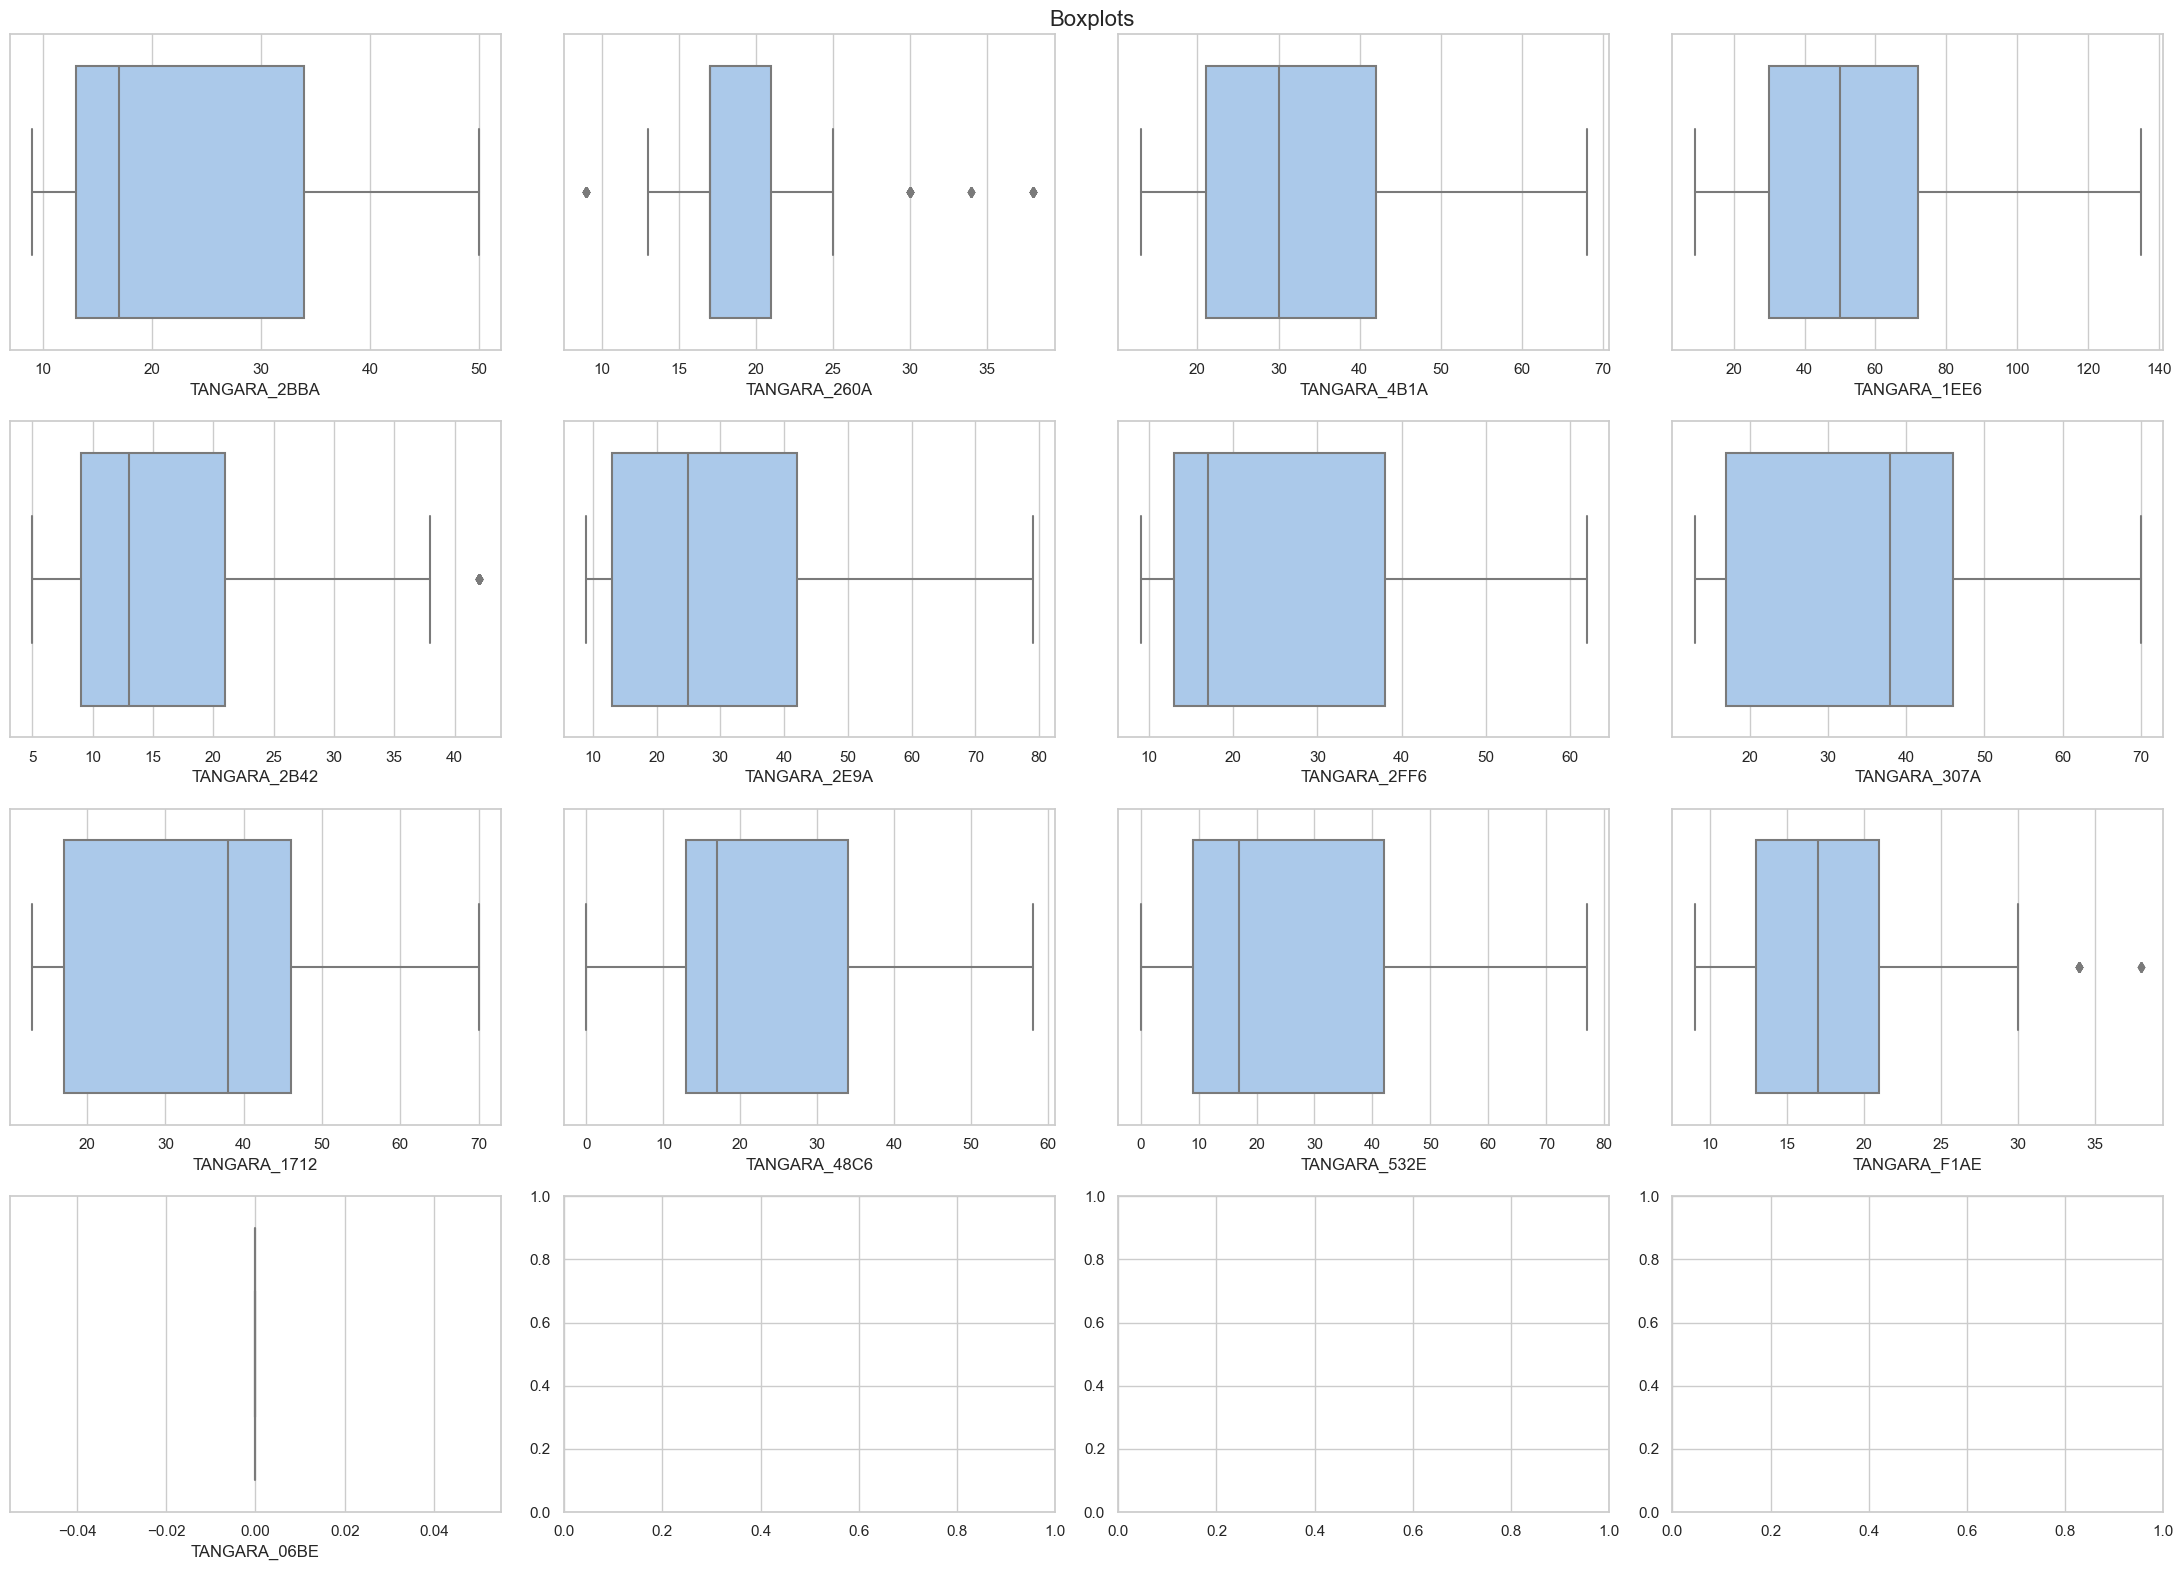

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

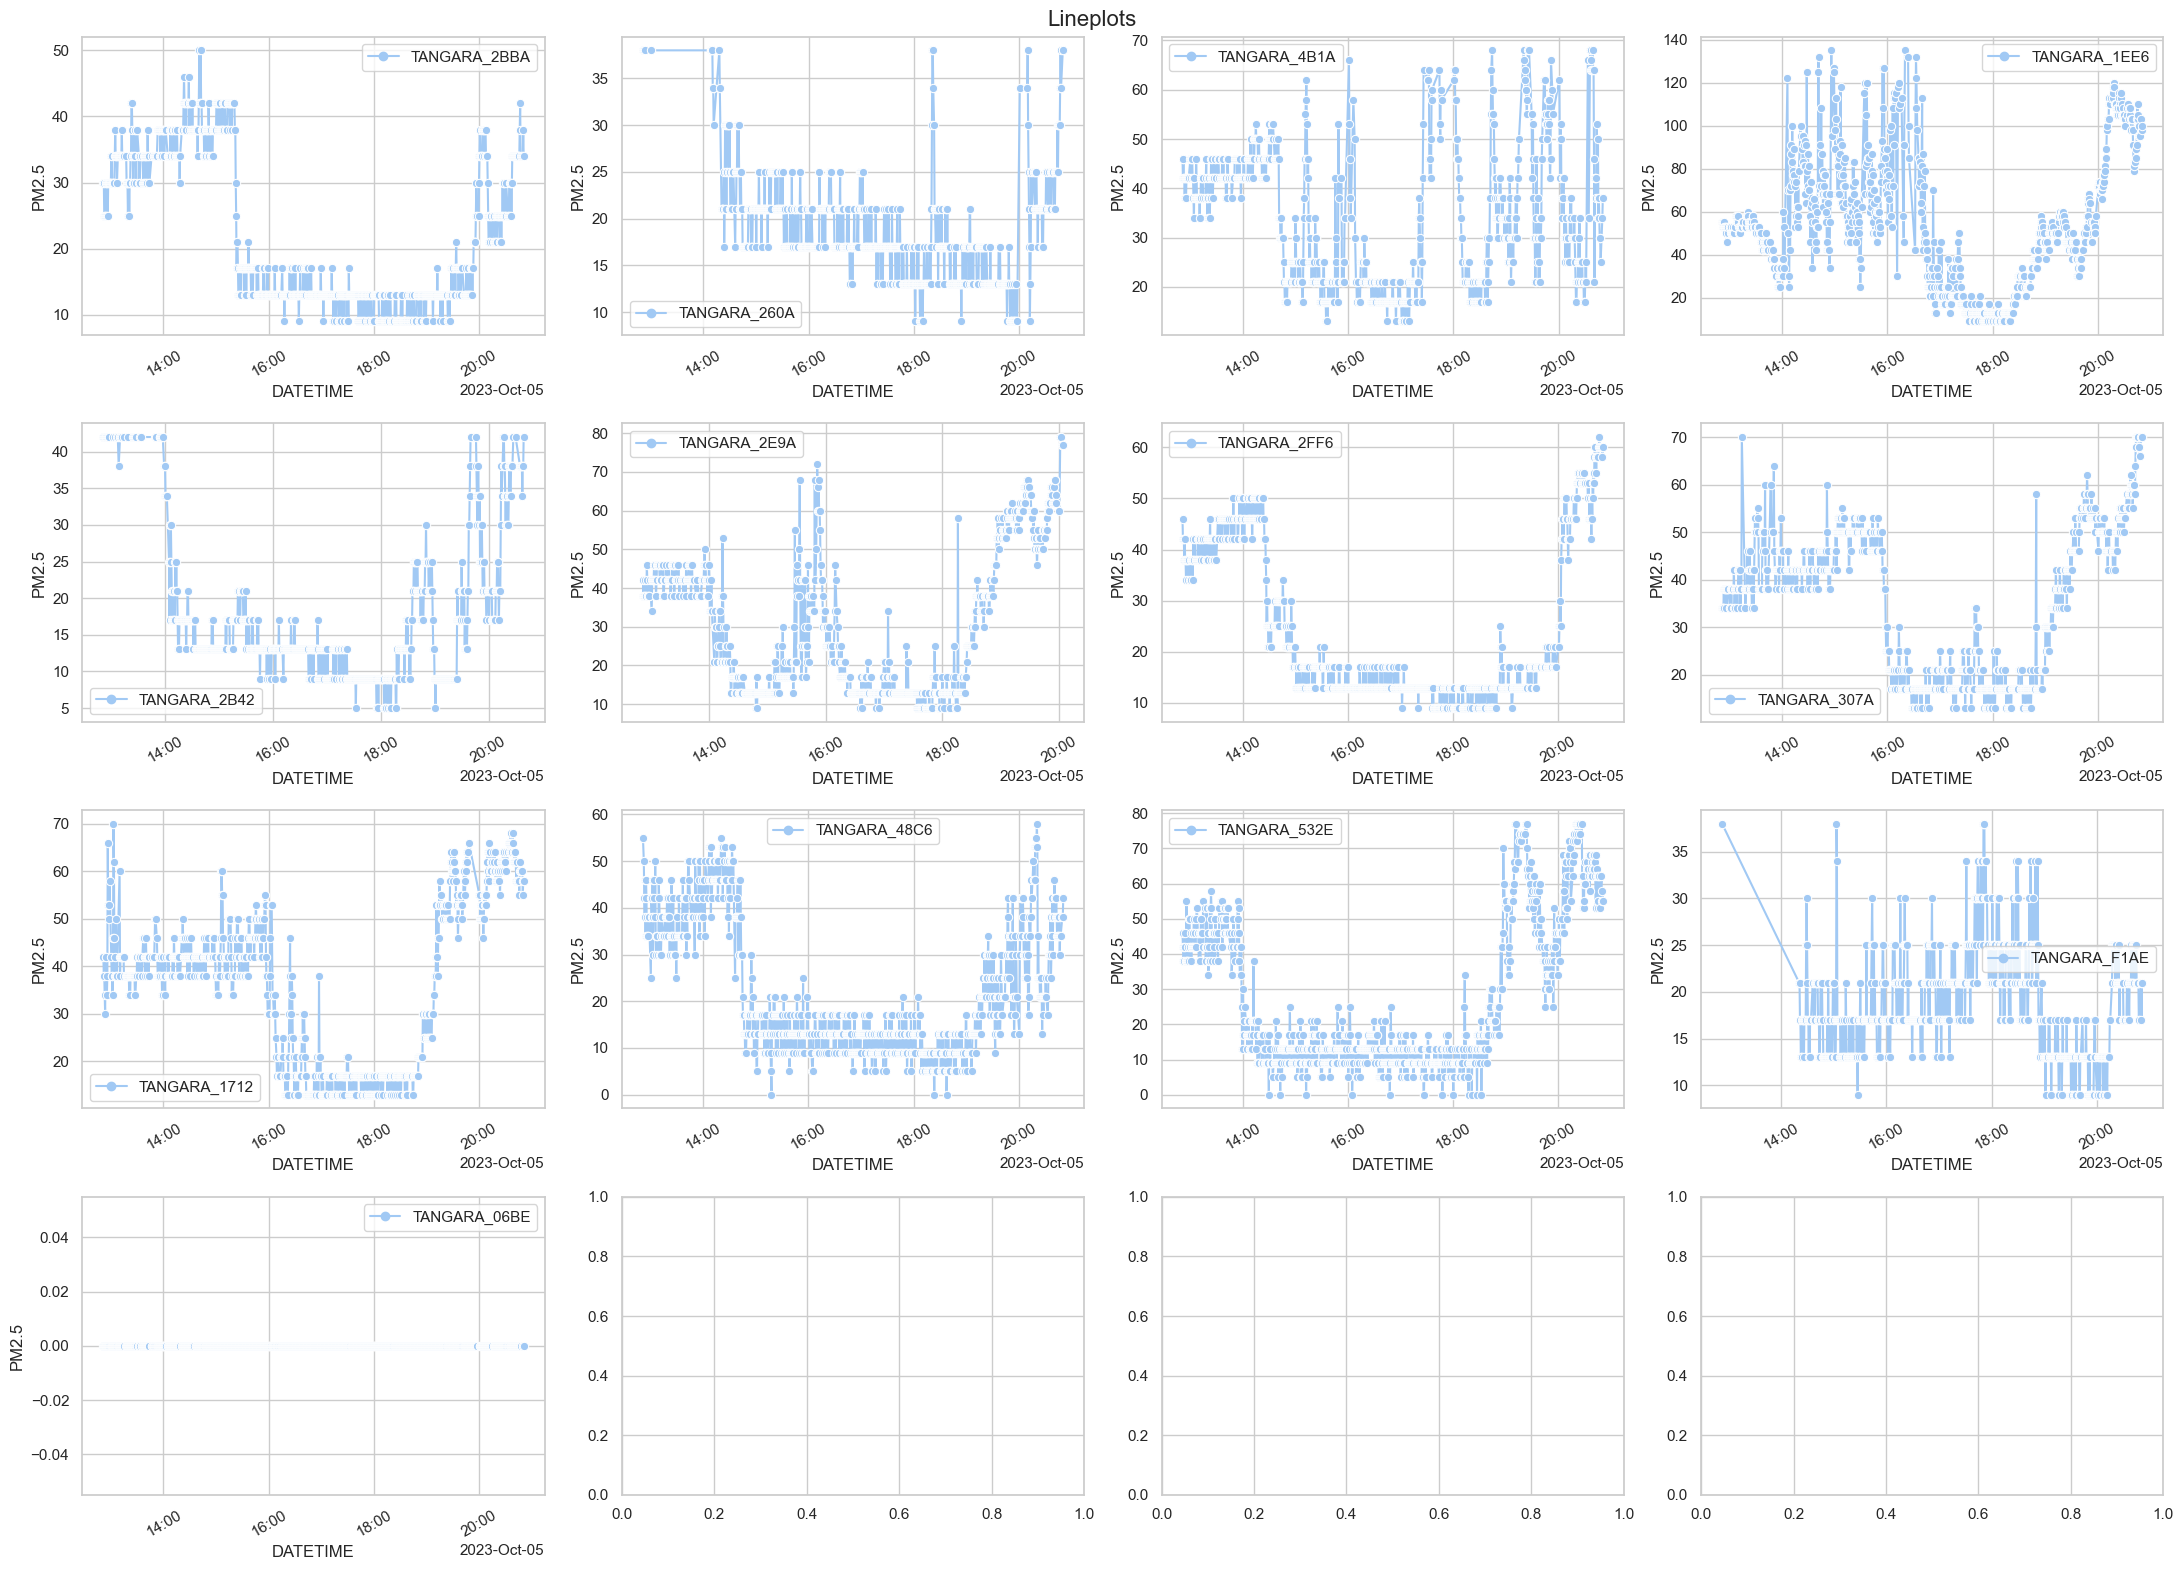

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')